In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
# Read the CSV file into a pandas dataframe
df = pd.read_csv('nutrition_data1.csv')
df

,Date,Meal,Time,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,...,Potassium,Carbohydrates (g),Fiber,Sugar,Protein (g),Vitamin A,Vitamin C,Calcium,Iron,Note
0,2/14/23,Breakfast,11:20 AM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,2/14/23,Breakfast,11:25 AM,710.0,24.5,6.3,0.0,4.5,0.0,140.0,...,400.0,91.5,2.5,26.5,33.0,15.0,1.0,31.0,2.0,NaN
2,2/14/23,Breakfast,11:30 AM,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,2/14/23,Lunch,4:35 PM,493.5,17.6,4.7,1.6,1.0,0.0,101.1,...,480.8,76.3,6.4,2.8,13.4,0.0,224.5,7.3,6.2,NaN
4,2/14/23,Dinner,8:20 PM,835.0,40.0,14.5,3.5,11.0,1.0,175.0,...,1321.0,69.0,7.0,3.0,45.0,133.0,56.0,59.0,45.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,4/5/23,Breakfast,9:20 AM,77.6,1.6,0.0,0.0,0.0,0.0,38.8,...,0.0,1.6,0.0,0.0,14.0,0.0,31.0,0.0,3.1,NaN
61,4/5/23,Breakfast,9:30 AM,391.6,20.7,4.4,0.9,1.5,0.0,152.6,...,810.1,48.7,5.5,26.0,6.9,9.0,30.7,3.2,6.7,NaN
62,4/5/23,Breakfast,10:30 AM,66.0,3.8,0.1,0.8,2.1,0.0,0.0,...,247.8,6.9,2.6,0.2,2.1,0.5,0.2,64.1,7.5,NaN
63,4/5/23,Breakfast,2:30 PM,134.6,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,25.0,1.0,3.8,5.8,0.0,0.0,9.6,10.7,NaN


In [38]:
# Get the list of column names
column_names = df.columns.tolist()

# Print the list of column names
print(column_names)

['Date', 'Meal', 'Time', 'Calories', 'Fat (g)', 'Saturated Fat', 'Polyunsaturated Fat', 'Monounsaturated Fat', 'Trans Fat', 'Cholesterol', 'Sodium (mg)', 'Potassium', 'Carbohydrates (g)', 'Fiber', 'Sugar', 'Protein (g)', 'Vitamin A', 'Vitamin C', 'Calcium', 'Iron', 'Note']


In [34]:
# Create three subset dataframes based on the "Meal" column
df_lunch = df[df['Meal'] == 'Lunch']
df_dinner = df[df['Meal'] == 'Dinner']
df_breakfast = df[df['Meal'] == 'Breakfast']
df_snacks = df[df['Meal'] == 'Snacks']

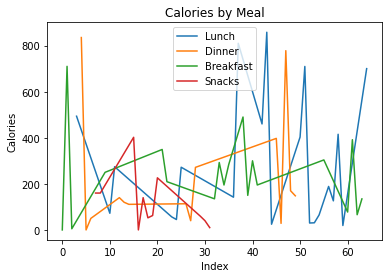

In [35]:
# Plot the line graph for the calories from each subset dataframe
plt.plot(df_lunch['Calories'], label='Lunch')
plt.plot(df_dinner['Calories'], label='Dinner')
plt.plot(df_breakfast['Calories'], label='Breakfast')
plt.plot(df_snacks['Calories'], label='Snacks')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Calories')
plt.title('Calories by Meal')
plt.show()

In [36]:
# Calculate the average calories per meal type
avg_calories = df.groupby('Meal')['Calories'].mean()

# Print the average calories per meal type
print(avg_calories)

Meal
Breakfast    238.878947
Dinner       228.764286
Lunch        295.061905
Snacks       119.381818
Name: Calories, dtype: float64


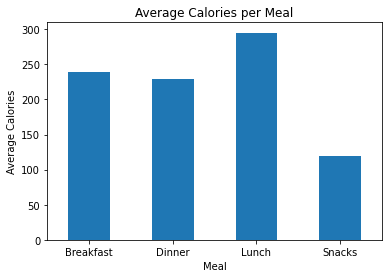

In [37]:
# Plot the bar chart
avg_calories.plot(kind='bar', rot=0)
plt.xlabel('Meal')
plt.ylabel('Average Calories')
plt.title('Average Calories per Meal')
plt.show()

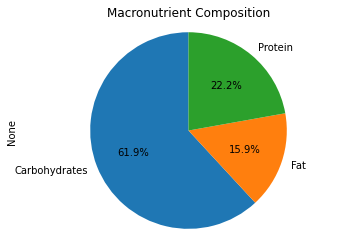

In [43]:
# Calculate the total amount of each macronutrient
total_carbs = df['Carbohydrates (g)'].sum()
total_fat = df['Fat (g)'].sum()
total_protein = df['Protein (g)'].sum()

# Create a pandas Series with the total amount of each macronutrient
nutrients = pd.Series([total_carbs, total_fat, total_protein],
                      index=['Carbohydrates', 'Fat', 'Protein'])

# Plot the pie chart
ax = nutrients.plot(kind='pie', autopct='%1.1f%%', startangle=90)
ax.set_facecolor('w')
plt.axis('equal')
plt.title('Macronutrient Composition')
plt.show()